<a href="https://colab.research.google.com/github/eugenie-kim012/DeepLearningDS4/blob/main/D%2B53_P2%2C_DL_%EA%B0%80%EC%A4%91%EC%B9%98_%EC%B4%88%EA%B8%B0%ED%99%94%2C_%EC%98%88%EC%8B%9C%2C_%EB%B0%B0%EC%B9%98_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가중치 초기화


In [6]:
!pip install tensorflow
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import initializers, activations

## 이부분 matplotlib 업데이트 되면서 없어진 부분
sns.set_style('white')
# plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    # 이부분을 이렇게 고쳐줘야 표가 나옵니다 -> numpy로 바꿔주면 계산속도 up
    plt.hist(input.numpy().flatten(), bins=20, range=(-1, 1))
    # plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

# 정규 분포 초기화

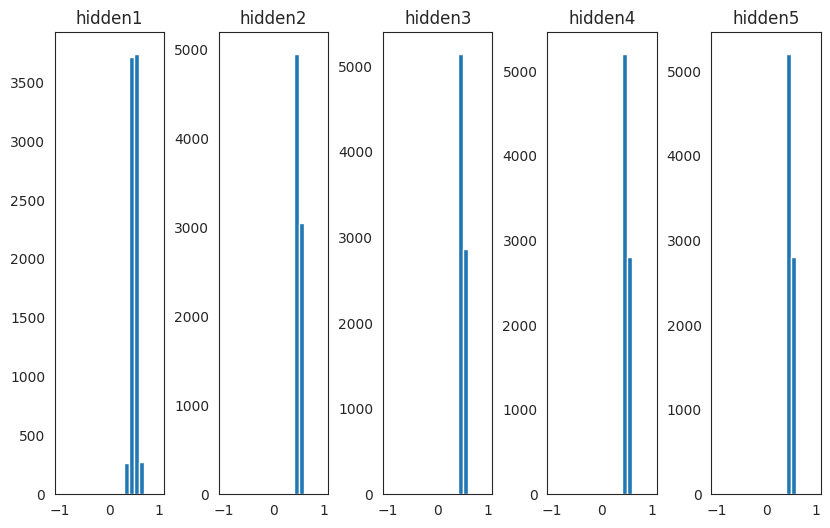

In [8]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

#균일 분포 초기화

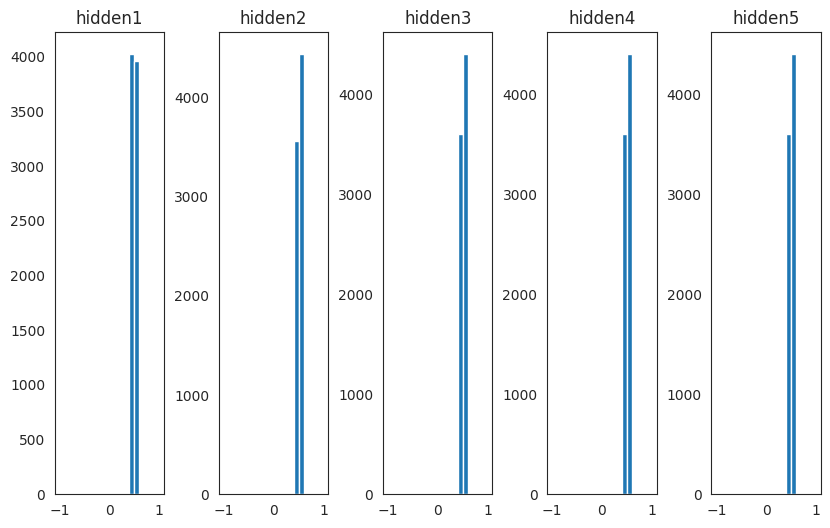

In [9]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

# Xavier(Glorot) 정규분포 초기화

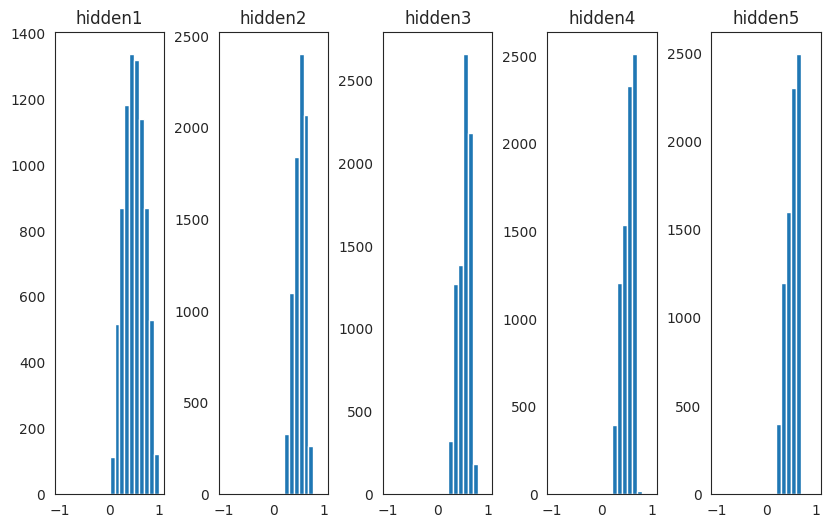

In [10]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

# Xavier(Glorot) 균일분포 초기화

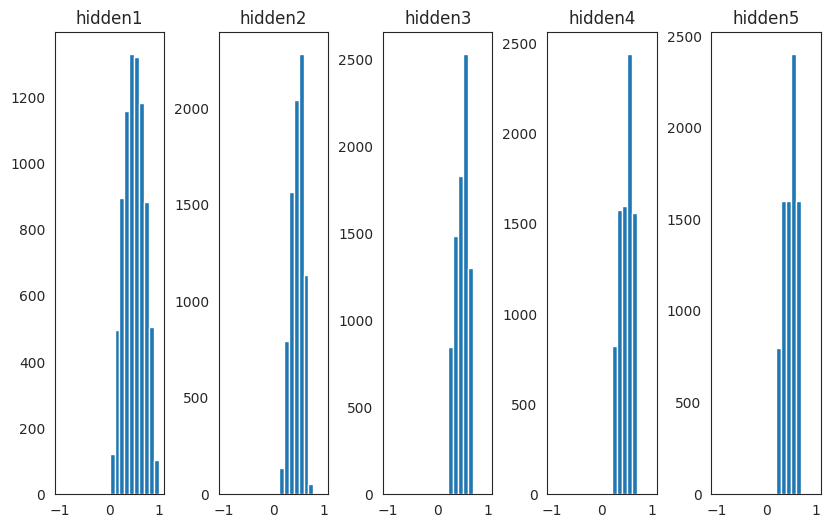

In [11]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

#활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있습니다.

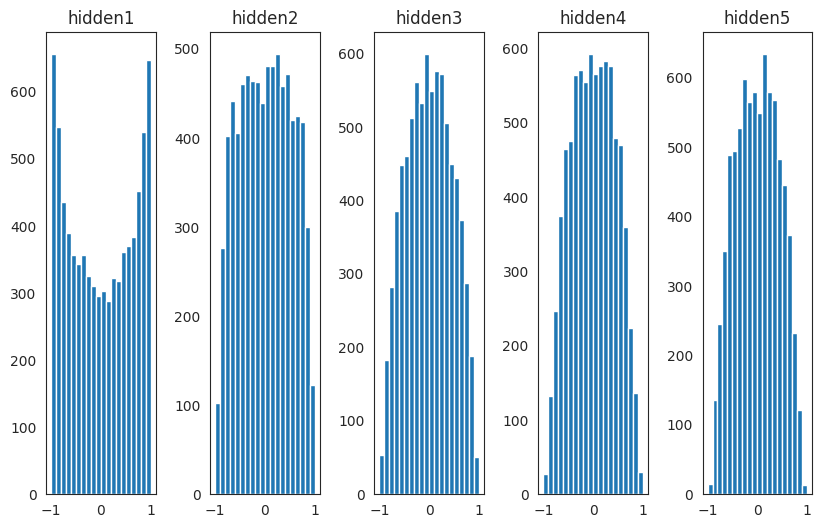

In [12]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

# He 정규분포 초기화

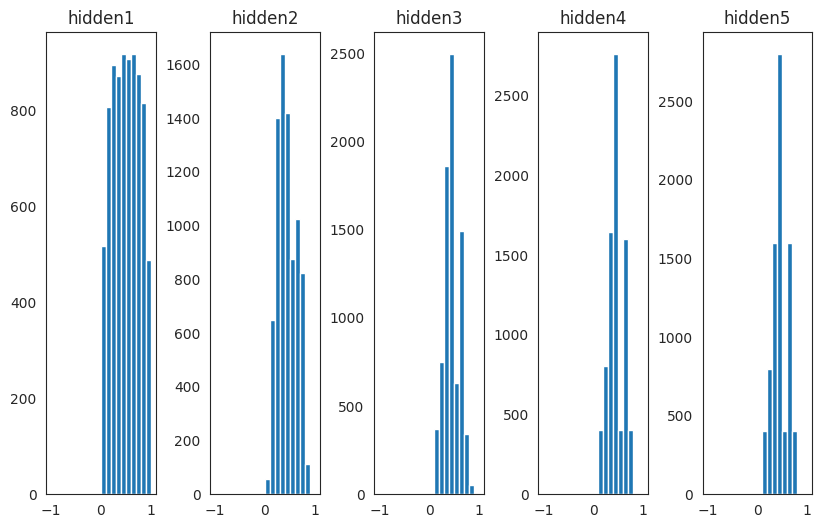

In [13]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

# He 균일 분포 초기화

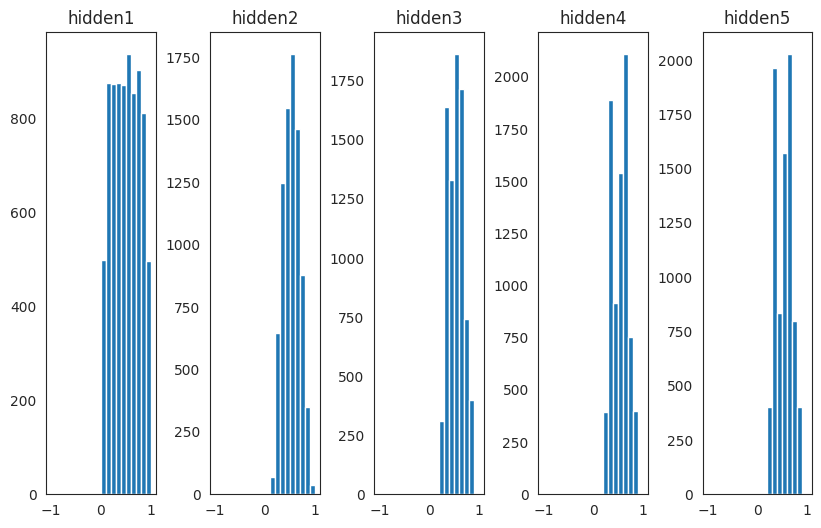

In [14]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

# 비 선형 함수 가중치 초기화

#제로 초기화

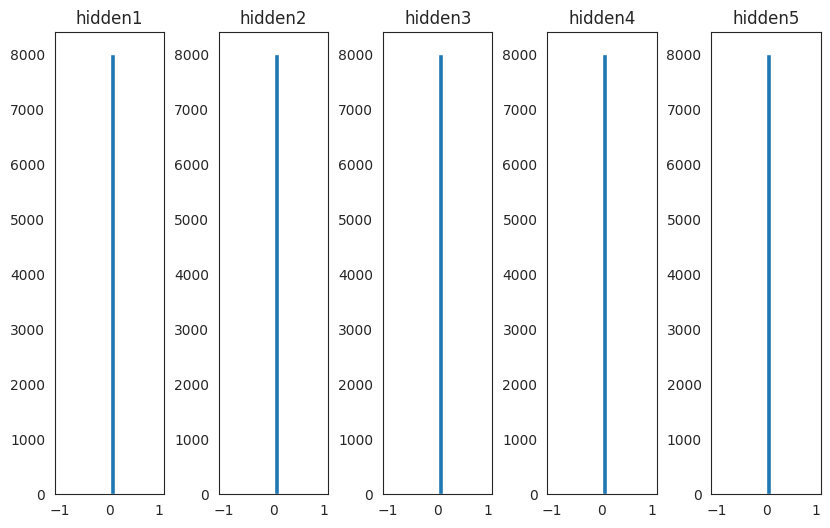

In [15]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

#정규 분포 초기화

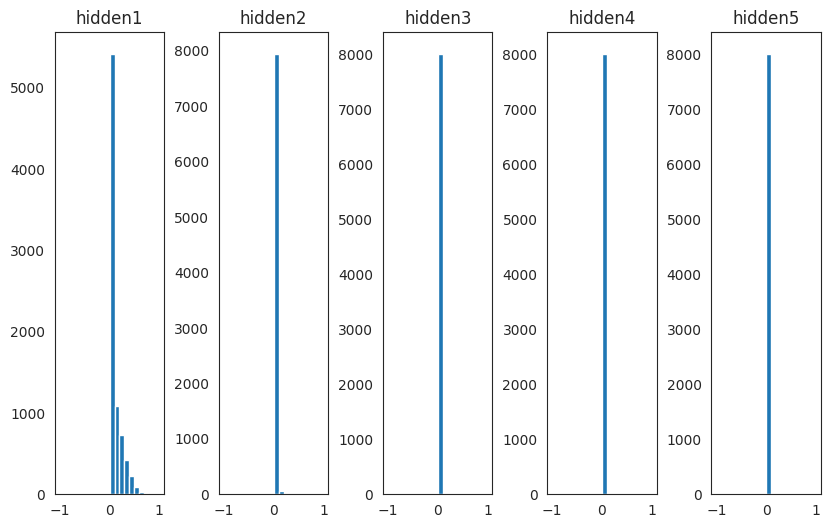

In [16]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

# 균일 분포 초기화

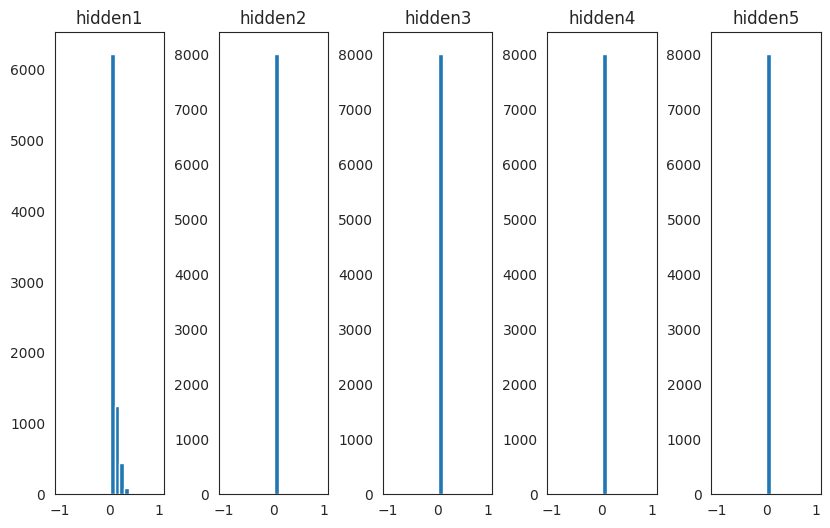

In [17]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

# Xavier(Glorot) 정규분포 초기화

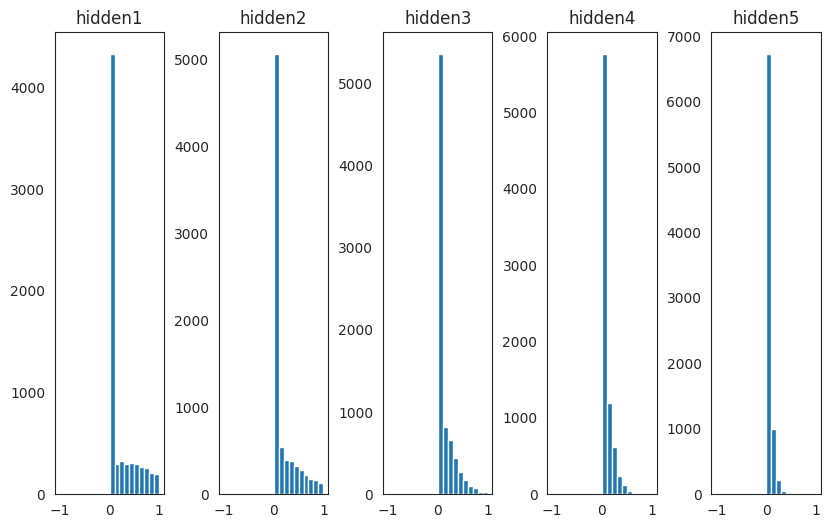

In [18]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

# Xavier(Glorot) 균일분포 초기화

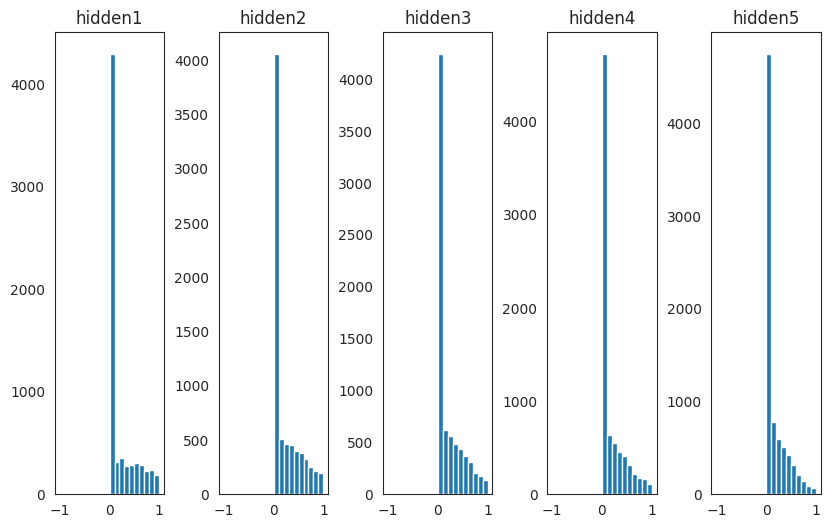

In [19]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

# He 정규분포 초기화

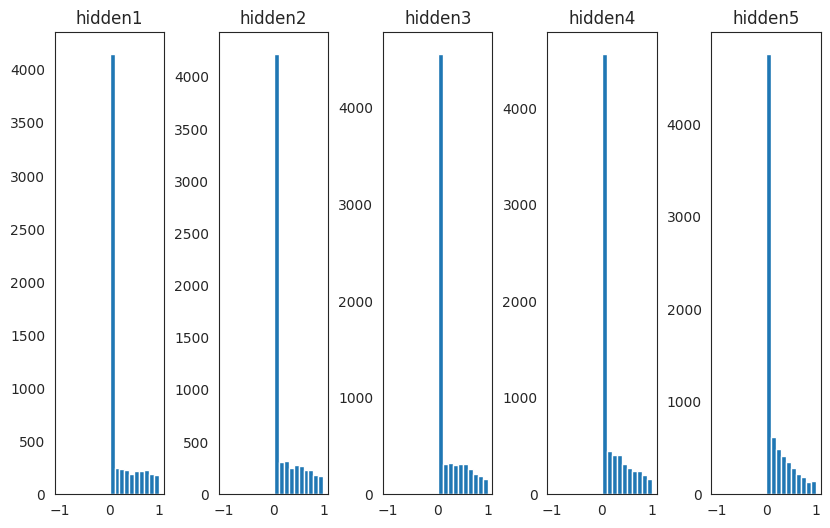

In [20]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

# He 균일 분포 초기화

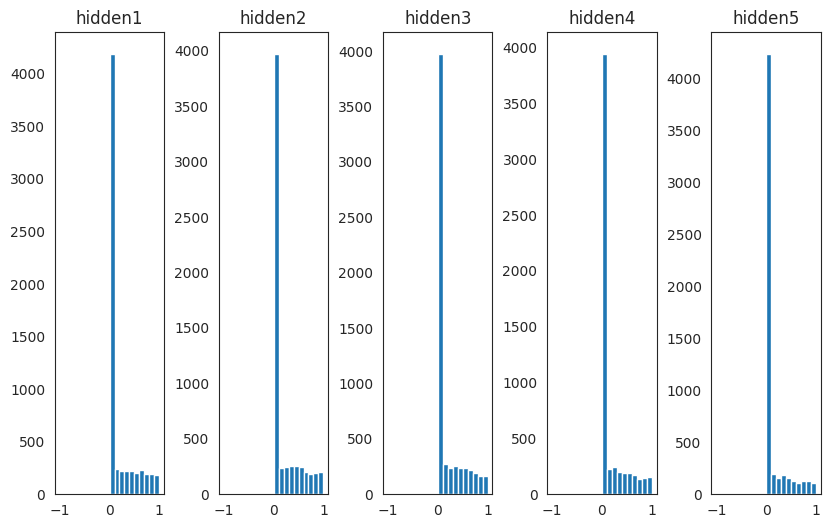

In [21]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

# Reuters 뉴스 데이터 셋

## 데이터 로드 및 전처리

In [22]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982
2246
46


In [23]:
word_index = reuters.get_word_index()
# word_index

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [25]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

* 단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad, 1은 문장의 시작을 의미하는 토큰인 sos, 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있습니다. 그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체합니다.

In [26]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

* def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

In [27]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [28]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [29]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성

In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 모델 컴파일 및 학습
* 정의한 모델에 사용할 옵티마이저는 rmsprop를 사용하고, 손실 함수는 다중 분류이므로 categorical_crossentropy를 지정합니다. 그리고 지표는 accuracy를 사용하고, 모델의 구조를 summary() 함수를 통해 살펴봅니다.

In [31]:
model.compile(optimizer='rmsprop', # Adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,302,574 (4.97 MB)

 Trainable params: 1,302,574 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.4418 - loss: 2.8841 - val_accuracy: 0.6696 - val_loss: 1.4993
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7228 - loss: 1.2696 - val_accuracy: 0.7199 - val_loss: 1.2357
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8028 - loss: 0.9166 - val_accuracy: 0.7649 - val_loss: 1.0507
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8486 - loss: 0.7002 - val_accuracy: 0.7756 - val_loss: 0.9757
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8842 - loss: 0.5392 - val_accuracy: 0.7916 - val_loss: 0.9101
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9122 - loss: 0.4112 - val_accuracy: 0.7836 - val_loss: 0.9231
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9296 - loss: 0.3217 - val_accuracy: 0.7965 - val_loss: 0.8910
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9394 - loss: 0.2717 - val_accuracy: 0.7881 - 

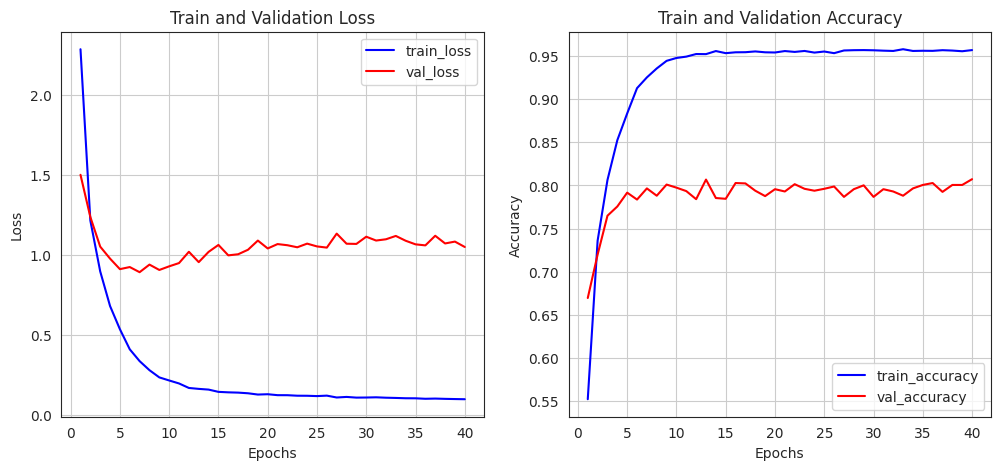

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델은 과접화된 상태

# 가중치 초기화

In [34]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [35]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

## 제로 초기화 모델을 생성, 학습

In [36]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1257 - loss: 3.8175 - val_accuracy: 0.3620 - val_loss: 3.7958
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3471 - loss: 3.7890 - val_accuracy: 0.3620 - val_loss: 3.7728
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3527 - loss: 3.7662 - val_accuracy: 0.3620 - val_loss: 3.7507
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3487 - loss: 3.7443 - val_accuracy: 0.3620 - val_loss: 3.7287
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3621 - loss: 3.7212 - val_accuracy: 0.3620 - val_loss: 3.7072
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.3519 - loss: 3.7003 - val_accuracy: 0.3620 - val_loss: 3.6857
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3515 - loss: 3.6778 - val_accuracy: 0.3620 - val_loss: 3.6644
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3534 - loss: 3.6576 - val_accuracy: 0.3620 - v

## 기본 모델과 제로 초기화 모델을 비교

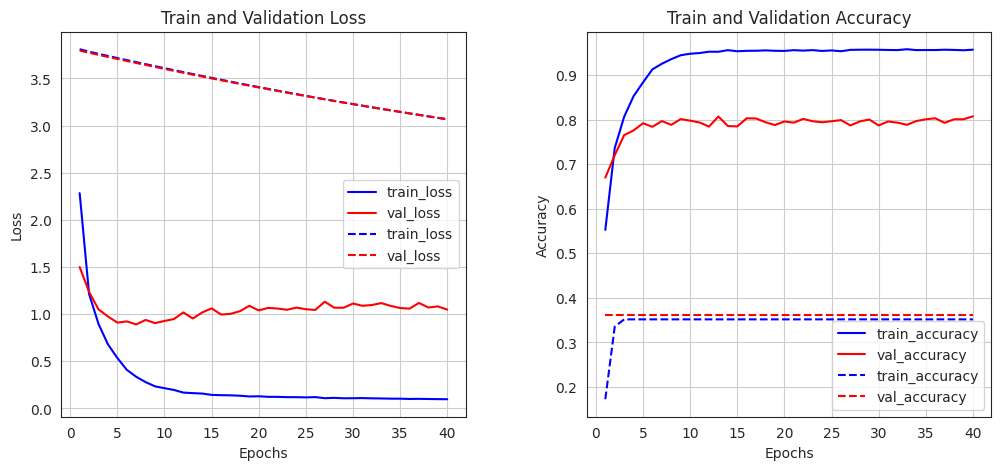

In [37]:
diff_history(history, zero_history)

##정규 분포 초기화

In [38]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3978 - loss: 2.9318 - val_accuracy: 0.6118 - val_loss: 1.6822
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6520 - loss: 1.5188 - val_accuracy: 0.6879 - val_loss: 1.3886
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7250 - loss: 1.1857 - val_accuracy: 0.7235 - val_loss: 1.2238
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7819 - loss: 0.9808 - val_accuracy: 0.7418 - val_loss: 1.1392
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8192 - loss: 0.7889 - val_accuracy: 0.7520 - val_loss: 1.0642
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8490 - loss: 0.6619 - val_accuracy: 0.7694 - val_loss: 1.0320
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8694 - loss: 0.5631 - val_accuracy: 0.7631 - val_loss: 1.0125
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8909 - loss: 0.4795 - val_accuracy: 0.7614 - v

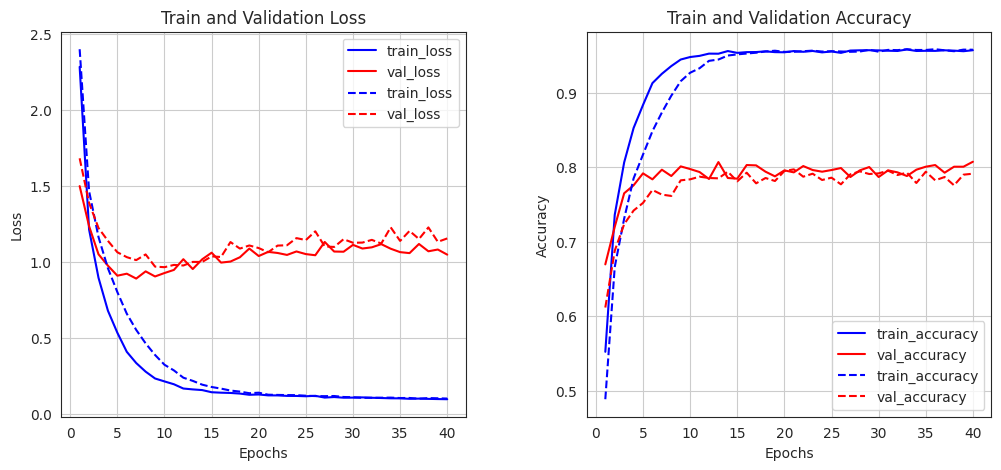

In [39]:
diff_history(history, normal_history)

## Xavier(Glorot) 초기화


In [40]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4421 - loss: 2.8139 - val_accuracy: 0.6638 - val_loss: 1.4885
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7131 - loss: 1.2875 - val_accuracy: 0.7302 - val_loss: 1.1983
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7948 - loss: 0.9452 - val_accuracy: 0.7627 - val_loss: 1.0639
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8402 - loss: 0.7288 - val_accuracy: 0.7778 - val_loss: 1.0179
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8848 - loss: 0.5574 - val_accuracy: 0.7885 - val_loss: 0.9371
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9058 - loss: 0.4439 - val_accuracy: 0.7903 - val_loss: 0.9103
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9247 - loss: 0.3450 - val_accuracy: 0.8014 - val_loss: 0.8742
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9290 - loss: 0.3058 - val_accuracy: 0.8028 - v

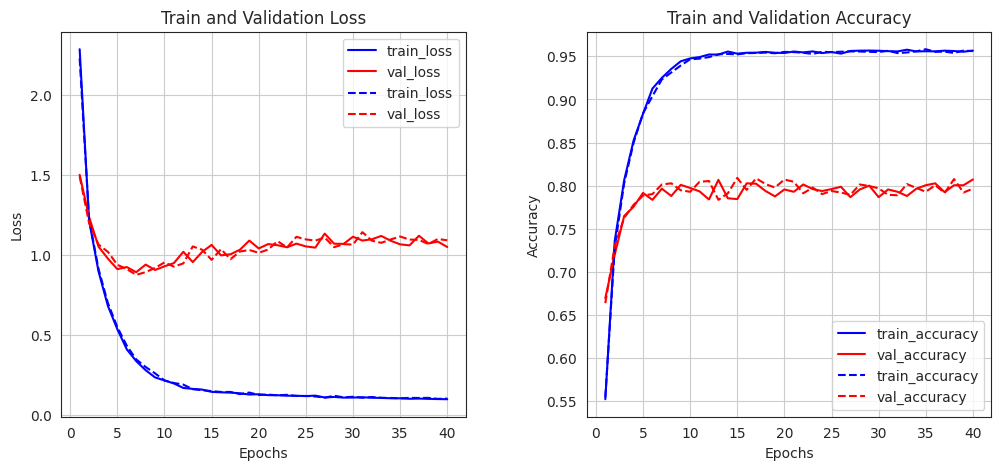

In [41]:
diff_history(history, glorot_history)

## He 초기화

In [42]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.4351 - loss: 2.7194 - val_accuracy: 0.6968 - val_loss: 1.4067
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7436 - loss: 1.1770 - val_accuracy: 0.7342 - val_loss: 1.1822
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8290 - loss: 0.8266 - val_accuracy: 0.7729 - val_loss: 0.9908
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8746 - loss: 0.5927 - val_accuracy: 0.7872 - val_loss: 0.9285
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9120 - loss: 0.4272 - val_accuracy: 0.7912 - val_loss: 0.9082
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9286 - loss: 0.3460 - val_accuracy: 0.7983 - val_loss: 0.8911
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9426 - loss: 0.2668 - val_accuracy: 0.8028 - val_loss: 0.8825
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9500 - loss: 0.2299 - val_accuracy: 0.8050 - v

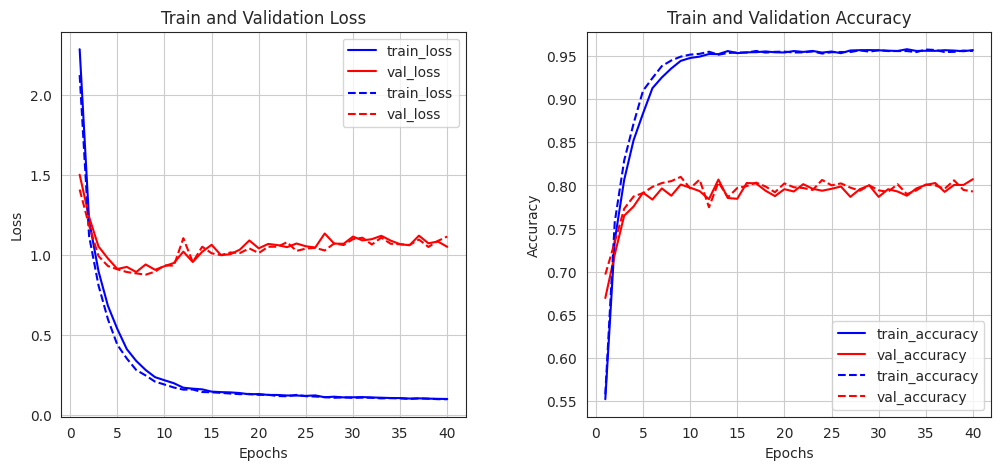

In [43]:
diff_history(history, he_history)
#He 초기화는 기존 모델과 비교하여 작지만 좀 더 빠르게 학습된 것을 알 수 있습니다. 현재 모델이 비선형 함수인 relu를 사용하여 He 초기화에 더 적합한 것을 알 수 있습니다.



# 배치 정규화

In [44]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [45]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.5084 - loss: 2.4484 - val_accuracy: 0.7369 - val_loss: 3.3182
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8721 - loss: 0.6894 - val_accuracy: 0.7440 - val_loss: 3.1210
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9401 - loss: 0.3426 - val_accuracy: 0.6897 - val_loss: 2.8282
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9545 - loss: 0.2221 - val_accuracy: 0.6932 - val_loss: 2.4609
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9573 - loss: 0.1689 - val_accuracy: 0.6242 - val_loss: 2.1493
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9537 - loss: 0.1457 - val_accuracy: 0.6532 - val_loss: 1.8429
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9561 - loss: 0.1252 - val_accuracy: 0.7075 - val_loss: 1.6127
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9582 - loss: 0.1144 - val_accuracy: 0.6959 - v

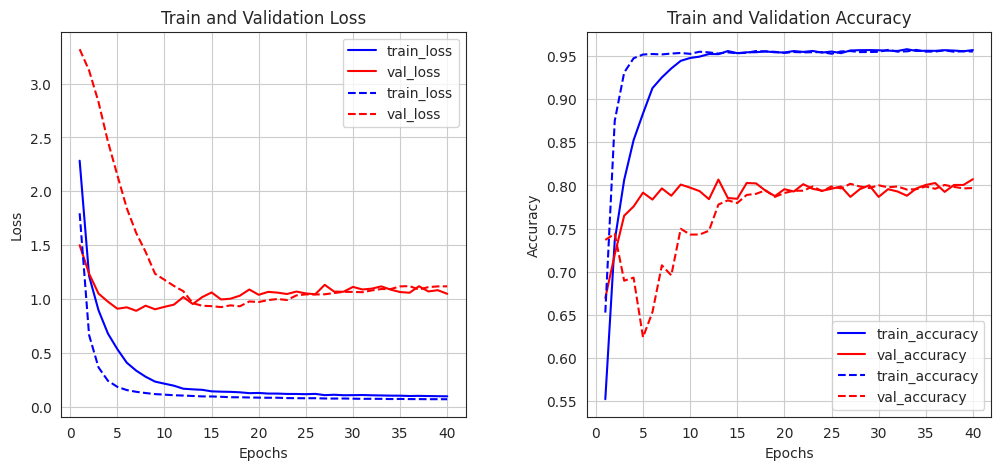

In [46]:
diff_history(history, batch_norm_history)

In [47]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [48]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.5077 - loss: 2.3907 - val_accuracy: 0.7337 - val_loss: 3.3249
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9064 - loss: 0.5485 - val_accuracy: 0.7573 - val_loss: 3.1399
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9425 - loss: 0.2930 - val_accuracy: 0.7360 - val_loss: 2.8845
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9548 - loss: 0.2040 - val_accuracy: 0.7386 - val_loss: 2.6747
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9554 - loss: 0.1690 - val_accuracy: 0.7560 - val_loss: 2.3623
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9570 - loss: 0.1452 - val_accuracy: 0.7654 - val_loss: 2.1806
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9594 - loss: 0.1271 - val_accuracy: 0.7676 - val_loss: 1.9236
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9573 - loss: 0.1208 - val_accuracy: 0.7783 - v